# Libraries

In [29]:
#data wrangling
import numpy as np
import pandas as pd

#model buildng
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import glm
import xgboost as xg

#feature selection
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#graph
import matplotlib.pyplot as plt

#statistical
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kendalltau

#extra
import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv('datasetCAC.csv')

In [31]:
data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,...,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,...,NaN,NaN,NaN,0,0,0,0.8204,62558,4796,1.1153,1,2,2,58218,58218,0,1,1,1,1,0,2.0,63.0,63.0,63.0,57762,57762,0.8231,57762,0.8231,0,NaN,1,1,1,0,NaN,0,NaN,526
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,0,0,0,0.1000,190,186,0.1430,1,1,1,190,190,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,496


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 305 entries, x001 to y
dtypes: float64(41), int64(264)
memory usage: 232.7 MB


In [33]:
data.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,1.000000e+05,78568.000000,78568.000000,78576.000000,93890.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,33539.000000,33539.000000,32747.000000,100000.000000,100000.000000,100000.000000,92811.000000,1.000000e+05,1.000000e+05,43869.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,75179.000000,50244.000000,50244.000000,50244.000000,1.000000e+05,1.000000e+05,48867.000000,1.000000e+05,13467.000000,1.000000e+05,41888.000000,100000.000000,100000.000000,100000.000000,100000.000000,26931.000000,100000.000000,18125.000000,100000.000000
mean,1.218244e+06,125.711727,25.541238,65.393212,178.238545,0.314040,0.694000,1.388220,1.192980,1.026990,1.843240,1.60794,1.576860,4.306830,12.943060,4.089260,8.853800,3.988200,2.147260,6.798700,2.283170,1.730500,1.08584,4.733060,0.318520,0.569790,0.751520,0.801850,1.476120,4.037540,5.351920,0.266290,0.817610,1.706180,3.143720,3.228160,0.159220,0.492090,1.013240,1.867910,...,21.155491,23.857482,0.704708,0.373070,0.384530,0.403520,0.587940,6.822113e+04,4.942003e+03,0.893664,0.256510,0.285610,0.348880,6.565756e+04,9.516506e+03,5.614105e+04,0.865850,0.873840,0.884140,1.391490,0.115260,3.239309,51.697994,25.445526,38.331656,1.461510e+04,5.839332e+04,0.812575,2.795508e+03,0.901304,1.181960e+04,0.794034,0.543320,0.558030,0.581830,0.106240,2.948758,6410.882910,1.037957,619.198230
std,2.728977e+05,115.785117,49.028751,63.592317,124.520628,0.464135,1.379378,2.282805,2.031083,1.713823,2.711524,2.58239,2.609533,5.473131,11.957652,4.622082,9.254211,2.361058,1.748446,7.829639,3.161361,1.120072,1.01191,7.159681,0.465905,0.495108,0.432134,1.579586,2.036195,4.782564,7.723711,0.890543,1.841711,3.138606,5.061691,3.471222,0.404389,0.814005,1.352606,2.191034,...,20.437170,20.987196,0.254535,0.483623,0.486486,0.490606,5.392342,1.787024e+05,2.905449e+04,13.087050,0.939979,1.008686,1.131413,1.779148e+05,5.026287e+04,1.705259e+05,0.340815,0.332031,0.320059,2.682935,0.695126,3.090414,52.700032,34.674418,38.882567,3.771714e+04,1.645305e+05,0.321268,1.751578e+04,0.433850,3.226469e+04,0.288249,0.498122,0.496624,0.493261,0.308146,2.129430,24190.243313,0.330580,118.461932
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,300.000000
25%,9.743635e+05,32.000000,3.000000,19.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,1.000000,2.00000

# Missing

In [34]:
data.isnull().sum()

x001        0
x002    21432
x003    21432
x004    21424
x005     6110
        ...  
x301        0
x302    73069
x303        0
x304    81875
y           0
Length: 305, dtype: int64

In [35]:
d = data.isnull().any()

In [36]:
#calculating percentage of missing data and storing in a dictionary
k = {}
for i,j in zip(d,data):
    if i==True:
        print("{} - {} % ".format(j,data[j].isnull().sum()/1000))
        k[j] = data[j].isnull().sum()/1000

x002 - 21.432 % 
x003 - 21.432 % 
x004 - 21.424 % 
x005 - 6.11 % 
x041 - 36.872 % 
x044 - 19.674 % 
x045 - 19.674 % 
x057 - 36.872 % 
x058 - 36.872 % 
x098 - 80.681 % 
x148 - 41.785 % 
x155 - 79.051 % 
x162 - 66.481 % 
x222 - 36.987 % 
x223 - 37.069 % 
x234 - 19.11 % 
x235 - 20.083 % 
x237 - 36.744 % 
x238 - 36.744 % 
x239 - 36.744 % 
x242 - 93.339 % 
x253 - 66.333 % 
x255 - 76.913 % 
x256 - 76.913 % 
x257 - 76.913 % 
x259 - 77.432 % 
x265 - 66.461 % 
x266 - 66.461 % 
x267 - 66.461 % 
x268 - 67.253 % 
x272 - 7.189 % 
x275 - 56.131 % 
x287 - 24.821 % 
x288 - 49.756 % 
x289 - 49.756 % 
x290 - 49.756 % 
x293 - 51.133 % 
x295 - 86.533 % 
x297 - 58.112 % 
x302 - 73.069 % 
x304 - 81.875 % 


In [37]:
#removing columns with more that 75% missing data
for i in k:
    if k[i]>=75:
        data = data.drop([i],axis=1)

#filling rest with mean    
for i in data:
    data[i].fillna(int(data[i].mean()), inplace=True)
#print(data)

In [38]:
#check
data.isnull().any().sum()

0

<hr>

In [39]:
y = data[['y']]
data = data.drop(['y'],axis=1)

In [40]:
print(y.shape)
print(data.shape)

(100000, 1)
(100000, 295)


<hr>

# No Scaling (Linear Regression)

## 1

In [41]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=1)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.3f' %r2)

MAE: 35.222
R2: 0.846


<hr>

## 2

In [43]:
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
#print(vif.round(1))

In [44]:
print("vif: ", vif.shape)
print("main: ", data.shape)

vif:  (296, 2)
main:  (100000, 295)


In [45]:
k = []
t=0
for i,j in zip(data.index,vif.index):
    if vif['VIF Factor'][j] < 5:
        k.append(vif['features'][j])
        #print(j)

In [46]:
new_dataset = data[k]

In [47]:

new_dataset.shape 

(100000, 58)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y, test_size=0.33, random_state=1)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67000, 58)
(33000, 58)
(67000, 1)
(33000, 1)


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.3f' %r2)

MAE: 50.367
R2: 0.716


<hr>

## 3

In [51]:
k = {}
for i in data:
    k[i] = data[i].unique().sum()

In [52]:
cat_features = []
cont_features = []
for i in k:
    if k[i]<7:
        cat_features.append(i)
    else:
        cont_features.append(i)

In [53]:
new_dataset_cat = data[cat_features]
new_dataset_cont = data[cont_features]

In [54]:
new_dataset_cat.head()

,x006,x025,x026,x027,x060,x067,x077,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x147,x154,x161,x180,x244,x245,x246,x247,x248,x249,x252,x260,x261,x262,x263,x269,x270,x271,x282,x283,x284,x298,x299,x300,x301
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0


In [55]:
k = {}
for i in new_dataset_cat:
    corr, _ = kendalltau(data[i], y)
    k[i] = corr

In [56]:
#sorted(k.items(), key=lambda x: x[1], reverse=True)
feat = []
s = 0
for i in k:
    if k[i]>0.35:
        s+=1
        feat.append(i)
if s==0:
    print("None")

In [57]:
data.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x296,x297,x298,x299,x300,x301,x302,x303
0,1540332,125.0,25.0,65.0,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,...,0,0,26.0,21.0,23.0,0.0000,0,0,0,0.0000,0,0,0.0000,0,0,0,0,0,0,1,1,1,0,0,3.0,51.0,25.0,38.0,0,0,0.0000,0,0,0.0000,0,0,0,0,2.0,0
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,...,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,0.0000,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5,5206,5206,0.9339,0,5206,0.9339,1,1,1,0,2.0,0
2,1089795,125.0,25.0,65.0,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,...,0,0,26.0,21.0,23.0,0.0000,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,3.0,51.0,25.0,38.0,0,0,0.0000,0,0,0.0000,0,0,0,0,2.0,0
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,...,0,0,26.0,21.0,23.0,0.0000,0,0,0,0.8204,62558,4796,1.1153,1,2,2,58218,58218,0,1,1,1,1,0,2.0,63.0,63.0,63.0,57762,57762,0.8231,57762,0,0.0000,1,1,1,0,2.0,0
4,1229670,34.0,25.0,29.0,34.0,1,0,0,0,3,0,0,0,0,3,2,1,2,1,3,2,2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,26.0,21.0,23.0,0.0000,0,0,0,0.1000,190,186,0.1430,1,1,1,190,190,0,1,1,1,0,0,3.0,51.0,25.0,38.0,0,0,0.0000,0,0,0.0000,0,0,0,0,2.0,0


In [58]:
new_dataset_cont.shape

(100000, 248)

In [59]:
#y['y']


In [60]:
k = {}
for j,i in zip(data,new_dataset_cont):
    corr, _ = stats.pearsonr(new_dataset_cont[i], y['y'])
    k[i] = corr

In [61]:
for i in k:
    if k[i]>0.5:
        feat.append(i)
if s==0:
    print("None")

In [62]:
new_dataset = data[feat]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y, test_size=0.33, random_state=1)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67000, 18)
(33000, 18)
(67000, 1)
(33000, 1)


In [65]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.3f' %r2)

MAE: 60.263
R2: 0.577


<hr>

## 4

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=1)

In [67]:
from sklearn.decomposition import PCA
  
pca = PCA()
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 60.263
R2: 0.58


<hr>

# Robust Scaling (Linear Regression)

Scaling

In [68]:
scaler = RobustScaler()

In [69]:
data_s = scaler.fit_transform(data)
y_s = scaler.fit_transform(y)

In [70]:
print(data_s.shape)
print(y_s.shape)

(100000, 295)
(100000, 1)


In [71]:
data_s = pd.DataFrame(data_s)
y_s = pd.DataFrame(y_s)

<hr>

## 5

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=42)

In [73]:
pca = PCA()
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 618.893
R2: -1067880.22


<hr>

## 6

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.180
R2: 0.85


<hr>

## 7

In [76]:
data_z = pd.DataFrame(data_s)
y_z = pd.DataFrame(y_s)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67000, 295)
(33000, 295)
(67000, 1)
(33000, 1)


In [79]:
x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
#print(vif.round(1))

In [80]:
print("vif: ", vif.shape)
print("main: ", data_s.shape)

vif:  (295, 2)
main:  (100000, 295)


In [81]:
k = []
t=0
for i,j in zip(data_s.index,vif.index):
    if vif['VIF Factor'][j] < 5:
        k.append(vif['features'][j])
        #print(j)

In [82]:
#new_dataset = data_s[k]
#data_s
#data.columns
#data_s.rename(columns = data.columns)
data_s = data_s[1:]
header = data.iloc[0]
data_s = data_s.rename(columns = header)

In [83]:
col = list(data.columns)

In [84]:
data_s.columns = col

In [85]:
new_dataset = data_s[k]

In [86]:
new_dataset.shape

(99999, 58)

In [90]:
#new_dataset = new_dataset.drop(new_dataset.index[[0]])
y_s = y_s.drop(y_s.index[[0]])
y_s = y_s.drop(y_s.index[[0]])

In [91]:
y_s.shape

(99998, 1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_s, test_size=0.33, random_state=1)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.252
R2: 0.71


<hr>

# Standard Scaling (Linear Regression)


In [94]:
scaler = StandardScaler()

data_s = scaler.fit_transform(data)
y_s = scaler.fit_transform(y)

data_s = pd.DataFrame(data_s)
y_s = pd.DataFrame(y_s)

col = list(data.columns)
data_s.columns = col

print(data_s.shape)
print(y_s.shape)


(100000, 295)
(100000, 1)


<hr>

## 8

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.297
R2: 0.85


<hr>

## 9

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

In [97]:
pca = PCA(n_components=70)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.297
R2: 0.85


<hr>

## 10

In [98]:
new_dataset_cat = data_s[cat_features]
new_dataset_cont = data_s[cont_features]

k = {}
for i in new_dataset_cat:
    corr, _ = kendalltau(data[i], y_s)
    k[i] = corr

#sorted(k.items(), key=lambda x: x[1], reverse=True)
feat = []
s = 0
for i in k:
    if k[i]>0.35:
        s+=1
        feat.append(i)
if s==0:
    print("None")

k = {}
for j,i in zip(data,new_dataset_cont):
    corr, _ = stats.pearsonr(new_dataset_cont[i], y_s[0])
    k[i] = corr

for i in k:
    if k[i]>0.5:
        feat.append(i)
if s==0:
    print("None")

new_dataset = data_s[feat]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y, test_size=0.33, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 618.599
R2: -27.10


[VIF](https://www.datasklr.com/ols-least-squares-regression/multicollinearity)

[K Best](https://machinelearningmastery.com/feature-selection-for-regression-data/)

[SE/Metrics](https://www.listendata.com/2018/01/linear-regression-in-python.html)

# Standard Scaling (XGBoost)

## 11

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

#instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                        n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
yhat = xgb_r.predict(X_test)
  
# RMSE Computation
#rmse = np.sqrt(MSE(test_y, pred))
#print("RMSE : % f" %(rmse))

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.479
R2: 0.67


<hr>

## 12

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

pca = PCA(n_components=70)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

#instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                        n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
yhat = xgb_r.predict(X_test)
  
# RMSE Computation
#rmse = np.sqrt(MSE(test_y, pred))
#print("RMSE : % f" %(rmse))

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.509
R2: 0.63


<hr>

## 13

In [102]:
new_dataset_cat = data_s[cat_features]
new_dataset_cont = data_s[cont_features]

k = {}
for i in new_dataset_cat:
    corr, _ = kendalltau(data_s[i], y_s)
    k[i] = corr

#sorted(k.items(), key=lambda x: x[1], reverse=True)
feat = []
s = 0
for i in k:
    if k[i]>0.35:
        s+=1
        feat.append(i)
if s==0:
    print("None")

k = {}
for j,i in zip(data_s,new_dataset_cont):
    corr, _ = stats.pearsonr(new_dataset_cont[i], y_s[0])
    k[i] = corr

for i in k:
    if k[i]>0.5:
        feat.append(i)
if s==0:
    print("None")

new_dataset = data_s[feat]

X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_s, test_size=0.33, random_state=1)

#instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                        n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
yhat = xgb_r.predict(X_test)
  
# RMSE Computation
#rmse = np.sqrt(MSE(test_y, pred))
#print("RMSE : % f" %(rmse))

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.565
R2: 0.54


<hr>

# Standard Scaling (NESTED) 

## 14 - Correlation + PCA

In [111]:
new_dataset_cat = data_s[cat_features]
new_dataset_cont = data_s[cont_features]

k = {}
for i in new_dataset_cat:
    corr, _ = kendalltau(data[i], y_s)
    k[i] = corr

#sorted(k.items(), key=lambda x: x[1], reverse=True)
feat = []
s = 0
for i in k:
    if k[i]>0.35:
        s+=1
        feat.append(i)
if s==0:
    print("None")

k = {}
for j,i in zip(data,new_dataset_cont):
    corr, _ = stats.pearsonr(new_dataset_cont[i], y_s[0])
    k[i] = corr

for i in k:
    if k[i]>0.5:
        feat.append(i)
if s==0:
    print("None")

new_dataset = data_s[feat]

Text(0, 0.5, 'cumulative explained variance')

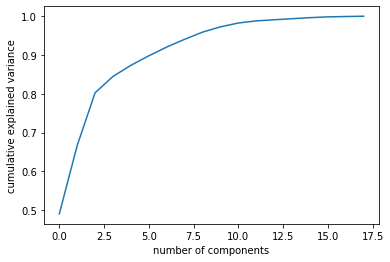

In [120]:
pca = PCA()
df = pca.fit_transform(new_dataset)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [122]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_s, test_size=0.33, random_state=1)

pca = PCA(n_components=10)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.565
R2: 0.54


<HR>

## 15 - VIF + Correlation

In [123]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
#print(vif.round(1))

k = []
t=0
for i,j in zip(data_s.index,vif.index):
    if vif['VIF Factor'][j] < 5:
        k.append(vif['features'][j])
        #print(j)

data_s = data_s[1:]
header = data.iloc[0]
data_s = data_s.rename(columns = header)

col = list(data.columns)

data_s.columns = col

new_dataset = data_s[k]

Text(0, 0.5, 'cumulative explained variance')

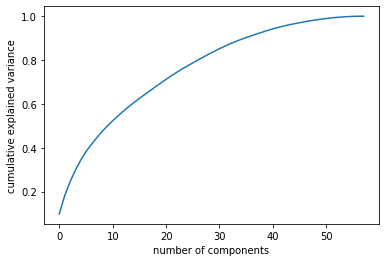

In [124]:
pca = PCA()
df = pca.fit_transform(new_dataset)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [127]:
y_z = y_s.drop(y_s.index[[0]])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_z, test_size=0.33, random_state=1)

pca = PCA(n_components=45)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.868
R2: -0.10


# MinMax Scaling (Linear Regression)

In [103]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=1)

X_train_s = scaler.fit_transform(data)
#y_s = scaler.fit_transform(y)

data_s = pd.DataFrame(data_s)
y_s = pd.DataFrame(y_s)

col = list(data.columns)
data_s.columns = col

print(data_s.shape)
print(y_s.shape)

(100000, 295)
(100000, 1)


<hr>

## 16

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.297
R2: 0.85


<hr>

## 17

Text(0, 0.5, 'cumulative explained variance')

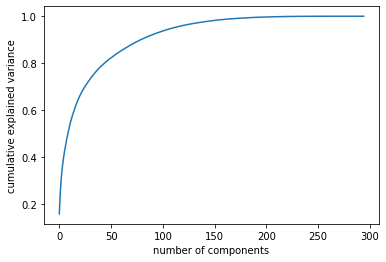

In [105]:
pca = PCA()
df = pca.fit_transform(data_s)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)
pca = PCA(n_components=60)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.297
R2: 0.85


<HR>

## 18

In [107]:

fs = SelectKBest(score_func=f_regression, k=200)

X_selected = fs.fit_transform(data_s, y_s)

print(X_selected.shape)

(100000, 200)


Text(0, 0.5, 'cumulative explained variance')

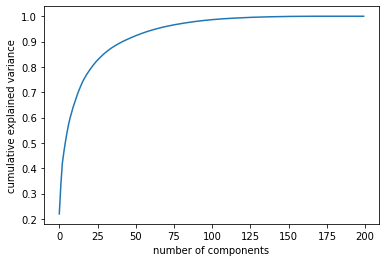

In [108]:
pca = PCA()
df = pca.fit_transform(X_selected)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_s, test_size=0.33, random_state=1)

In [110]:
pca = PCA(n_components=100)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))

MAE: 0.297
R2: 0.85


## 19

Text(0, 0.5, 'cumulative explained variance')

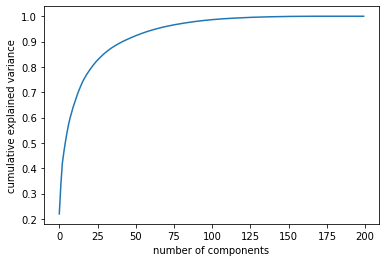

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data_s, y_s, test_size=0.33, random_state=1)

x_temp = sm.add_constant(X_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
#print(vif.round(1))

k = []
t=0
for i,j in zip(data_s.index,vif.index):
    if vif['VIF Factor'][j] < 5:
        k.append(vif['features'][j])
        #print(j)

data_s = data_s[1:]
header = data.iloc[0]
data_s = data_s.rename(columns = header)

col = list(data.columns)

data_s.columns = col

pca = PCA()
df = pca.fit_transform(X_selected)
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_z, test_size=0.33, random_state=1)

pca = PCA(n_components=45)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

model = LinearRegression()
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
r2 = r2_score(y_test,yhat)
print('R2: %.2f' %r2_score(y_test,yhat))